In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [6]:
np.random.seed(42)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)


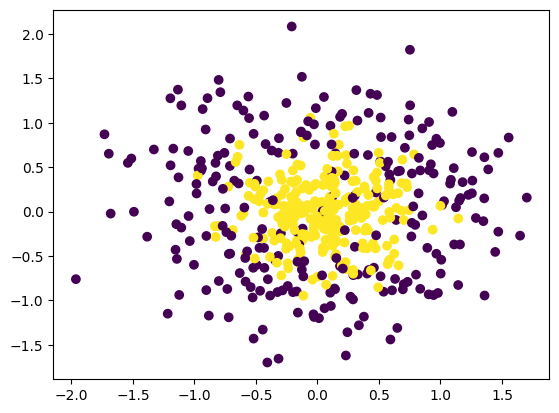

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc=AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [13]:
abc.fit(X,y)

AdaBoostClassifier()

In [17]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12,8))
    x_range=np.linspace(X.min(),X.max(),100)
    xx1,xx2=np.meshgrid(x_range,x_range)
    y_hat=clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    y_hat=y_hat.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_hat,alpha=0.2)
    plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=.7)
    plt.title('adaclassifiers')
    plt.show()

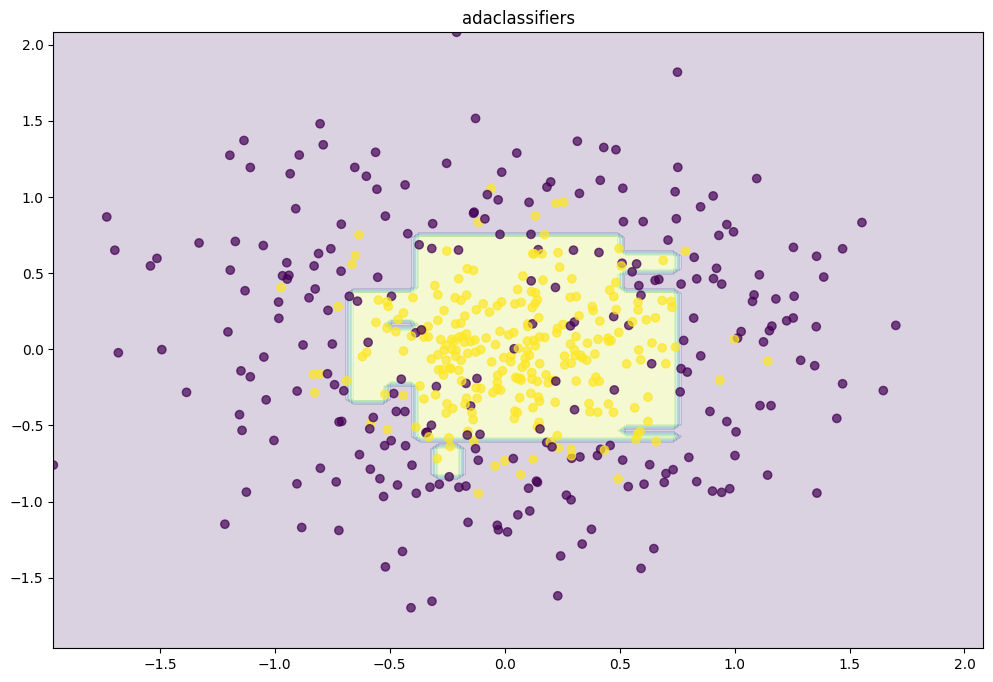

In [18]:
plot_decision_boundary(abc)

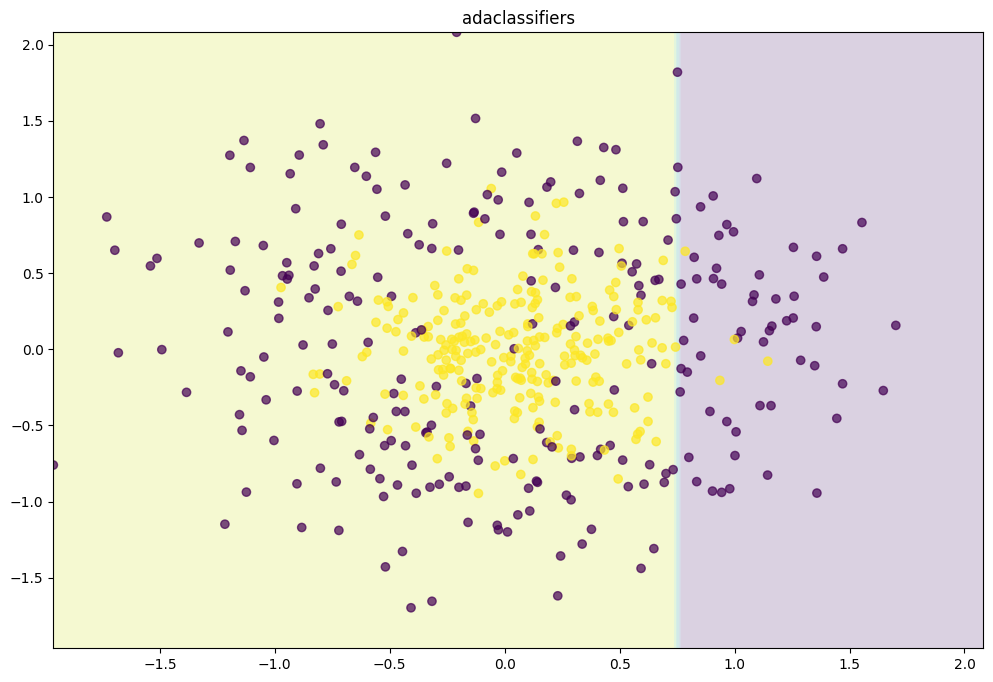

In [20]:
abc=AdaBoostClassifier(n_estimators=1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [25]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10,50,100,500]
grid['learning_rate']=[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm']=['SAMME','SAMME.R']

grid_search=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv=10,scoring='accuracy')

grid_result=grid_search.fit(X,y)
print('Best:%f using %s'%(grid_search.best_score_,grid_search.best_params_))

Best:0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
